In [1]:
import pandas as pd

# Loading the dataset
df = pd.read_csv("city_day.csv")

# Checking the shape and first few rows
"Shape of dataset:", df.shape
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


#### Basic info & Missing values

In [2]:
# Checking data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [3]:
# Checking missing values
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

#### Converting "Date" column to datetime


In [4]:
# Converting "Date" column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

In [5]:
# Checking the updated column type
df.dtypes["Date"]

dtype('<M8[ns]')

#### Focusing on a Single City (e.g., Delhi)

In [6]:
# Filtering data for Delhi
city_df = df[df["City"] == "Delhi"].copy()

In [7]:
# Sorting by date judt to be safe
city_df.sort_values("Date", inplace = True)

In [8]:
# Resetting index
city_df.reset_index(drop = True, inplace = True)

In [9]:
# Quick check
city_df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
1,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
2,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
3,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
4,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


#### Setting "Date" as the Index

In [10]:
# Setting "Date" as the index
city_df.set_index("Date", inplace = True)

In [11]:
# Confirming the index and preview
city_df.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', name='Date', length=2009, freq=None)

#### Data Visualization - AQI Over Time

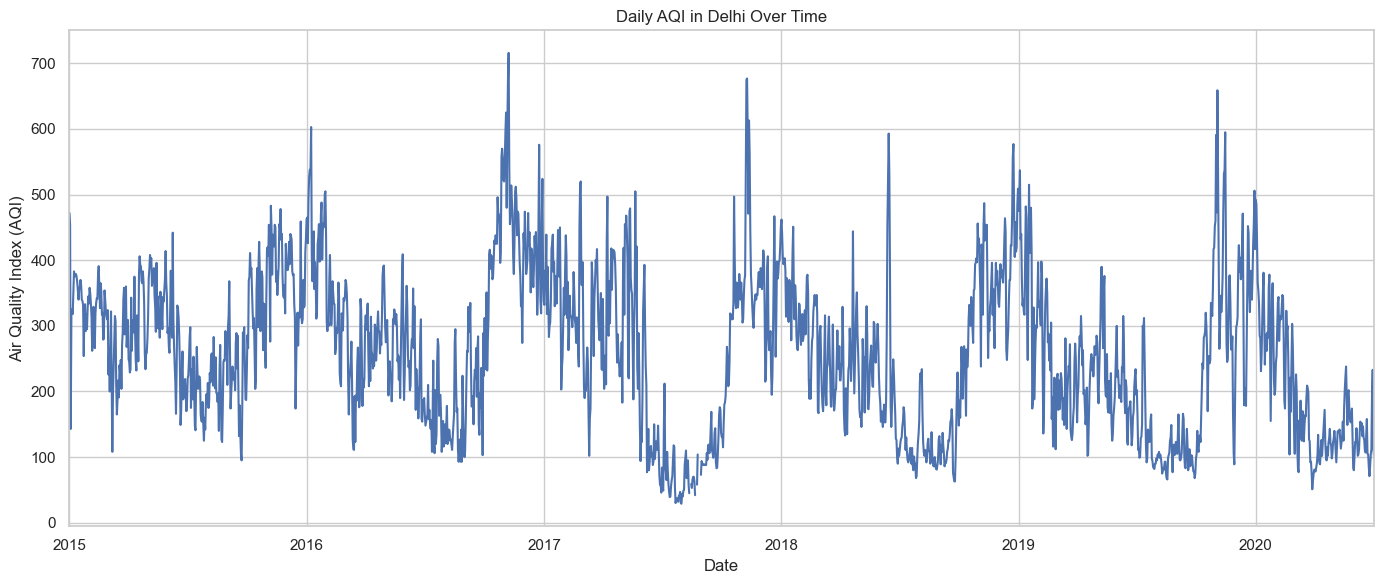

In [12]:
import matplotlib.pyplot as plt
import seaborn as sn

# Setting plot style
sn.set(style = "whitegrid")

#Plotting AQI over time
plt.figure(figsize = (14, 6))
city_df["AQI"].plot()
plt.title("Daily AQI in Delhi Over Time")
plt.xlabel("Date")
plt.ylabel("Air Quality Index (AQI)")
plt.tight_layout()
plt.show()

#### Visualizing PM2.5 Over Time

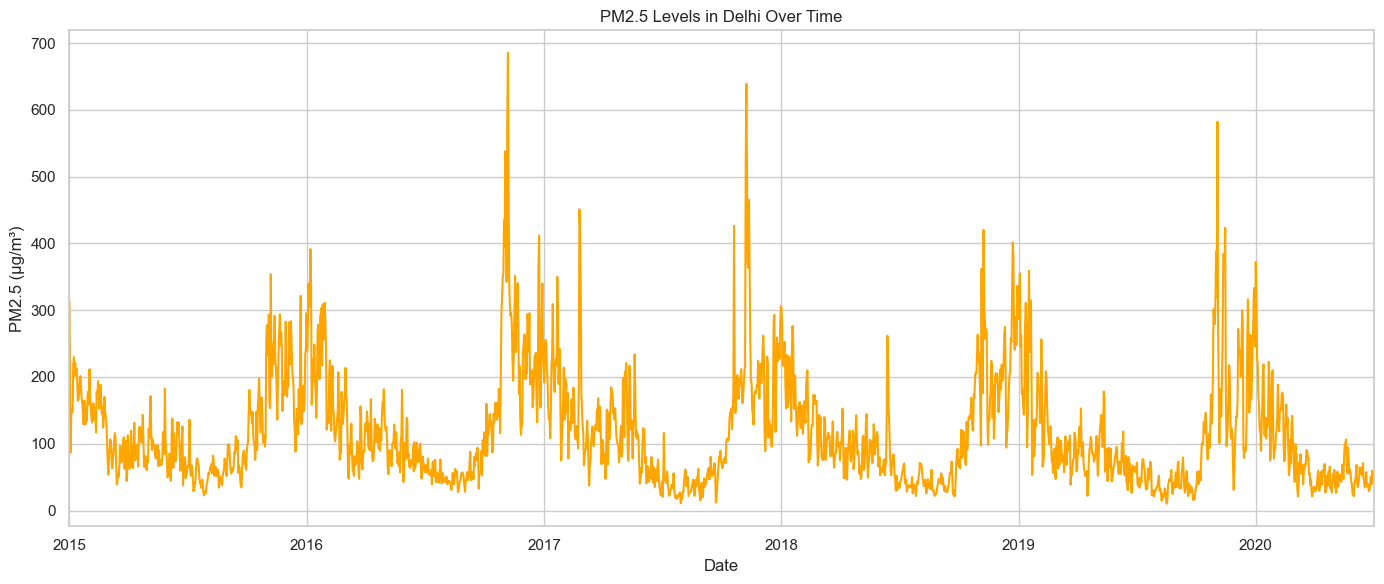

In [13]:
plt.figure(figsize=(14, 6))
city_df["PM2.5"].plot(color = "orange")
plt.title("PM2.5 Levels in Delhi Over Time")
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")
plt.tight_layout()
plt.show()

#### Handling Missing Values (Required for ARIMA)

In [14]:
# Creating a copy to avoid messing up original data
ts_df = city_df[["AQI"]].copy()

In [15]:
# Forwarding-fill missing values
ts_df["AQI"] = ts_df["AQI"].fillna(method = "ffill")

C:\Users\nishz\AppData\Local\Temp\ipykernel_23680\1740913813.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts_df["AQI"] = ts_df["AQI"].fillna(method = "ffill")


In [16]:
ts_df.isnull().sum()

AQI    0
dtype: int64

#### Checking Stationarity with Augmented Dickey-Fuller (ADF) Test

In [18]:
from statsmodels.tsa.stattools import adfuller

# ADF Test
result = adfuller(ts_df["AQI"])

# Outputting the test results
"ADF Statistic:", result[0]
"p-value:", result[1]

('p-value:', np.float64(0.009914982124297428))

#### Fitting an ARIMA Model

In [19]:
from statsmodels.tsa.arima.model import ARIMA

# Fitting ARIMA(1,0,1) model
model = ARIMA(ts_df["AQI"], order = (1, 0, 1))
model_fit = model.fit()

# Summary of the model
model_fit.summary()

C:\Users\nishz\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nishz\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nishz\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    AQI   No. Observations:                 2009
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -10769.424
Date:                Thu, 03 Jul 2025   AIC                          21546.848
Time:                        10:43:53   BIC                          21569.270
Sample:                    01-01-2015   HQIC                         21555.079
                         - 07-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        258.6339     12.563     20.587      0.000     234.011     283.257
ar.L1          0.8941      0.011     79.274      0.000       0.872       0.916
ma.L1          0.0506      0.019      2.725      0.006       0.014       0.087
sigma2      2650.5614     61.069     43.403      0.000    2530.868    2770.255
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):               397.89
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.13
Prob(H) (two-sided):                  0.09   Kurtosis:                         5.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Forecasting Future AQI Values

In [20]:
# Forcasting next 30 days
forecast_steps = 30
forecast = model_fit.forecast(steps = forecast_steps)

In [22]:
# Creating future data index
last_date = ts_df.index[-1]
future_dates = pd.date_range(start = last_date + pd.Timedelta(days = 1), periods = forecast_steps)


In [23]:
# Building forecast dataframe
forecast_df = pd.DataFrame({"Date": future_dates, "Forecasted_AQI": forecast})
forecast_df.set_index("Date", inplace = True)

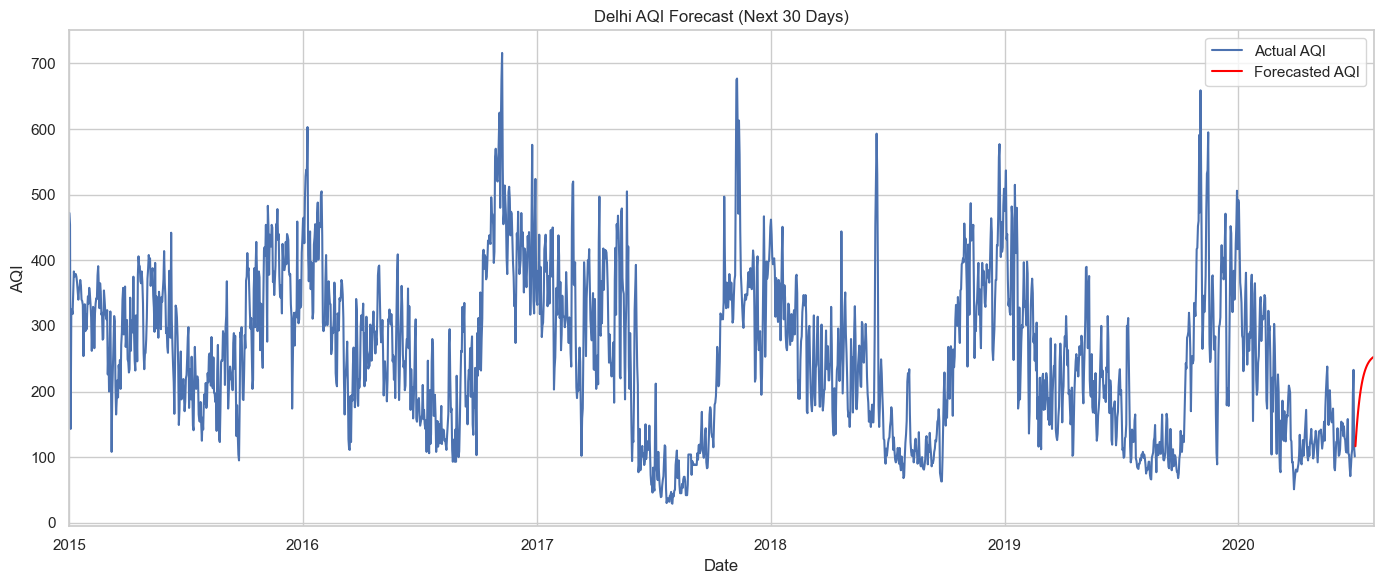

In [24]:
# PLotting actual + forecast
plt.figure(figsize = (14, 6))
ts_df["AQI"].plot(label = "Actual AQI")
forecast_df["Forecasted_AQI"].plot(label = "Forecasted AQI", color = "red")
plt.title("Delhi AQI Forecast (Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend()
plt.tight_layout()
plt.show()

#### Predicting AQI using pollutants (PM2.5, PM10, N02, etc.)

##### Preparing Features and Target

In [25]:
# Selecting relevant pollutant columns as features
features = ["PM2.5", "PM10", "NO", "NOx", "NH3", "CO", "SO2", "O3", "Toluene", "Xylene"]
target = "AQI"

In [26]:
# Creating a new DataFrame with only these columns
ml_df = city_df[features + [target]].copy()

In [27]:
# Dropping rows with missing values 
ml_df.dropna(inplace = True)

In [28]:
# Splitting into X and y
X = ml_df[features]
y = ml_df[target]

In [29]:
# Showing shape
"Shape of dataset:", X.shape

('Shape of dataset:', (1224, 10))

##### Train-Test Split and Model Training 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Splitting into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Creating and fitting the model
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

# Predicting on test set
y_pred = rf_model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [32]:
f"MAE: {mae:.2f}"
f"RMSE: {rmse:.2f}"
f"R² Score: {r2:.4f}"

'R² Score: 0.9433'

#### Visualizing the Model Results

##### Plotting Actual vs Predicted AQI

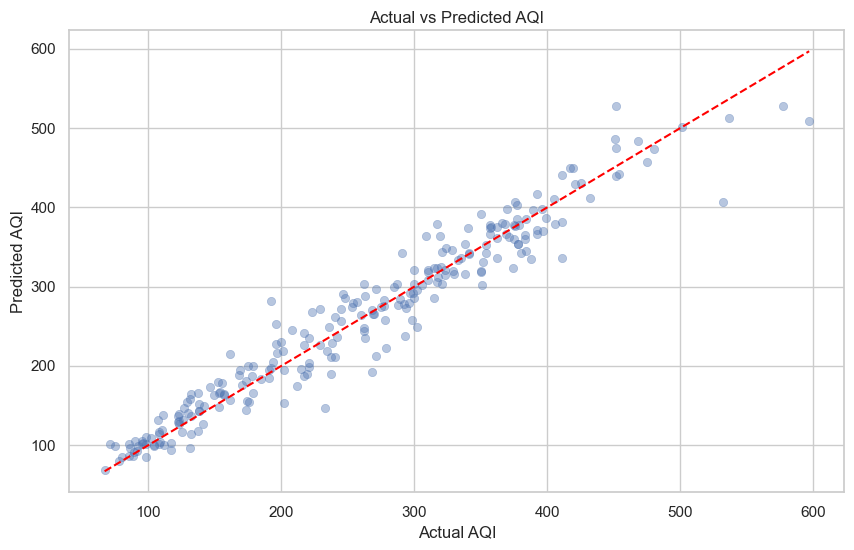

In [33]:
plt.figure(figsize = (10, 6))
sn.scatterplot(x = y_test, y = y_pred, alpha = 0.4, edgecolor = None)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = "red", linestyle = "--")
plt.grid(True)
plt.show()

##### Feature importance (Which pollutannts influence AQI most)

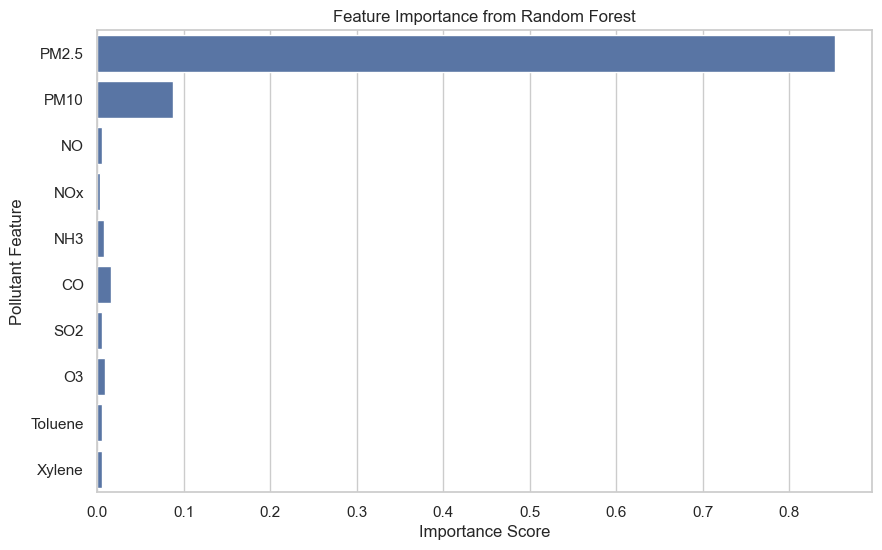

In [34]:
# Getting feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Plotting
plt.figure(figsize = (10, 6))
sn.barplot(x = importances, y = feature_names)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Pollutant Feature")
plt.show()

#### Gradient Boosting Regressor

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Initializing and training the model
gb_model = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, random_state = 42)
gb_model.fit(X_train, y_train)

# 2. Predicting
y_pred_gb = gb_model.predict(X_test)

# 3. Evaluating 
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

f"Gradient Bossting MAE: {mae_gb:.2f}"
f"Gradient Bossting RMSE: {rmse_gb:.2f}"
f"Gradient Bossting R² Score: {r2_gb:.4f}"

'Gradient Bossting R² Score: 0.9454'

#### Visualizing the Model Results

##### Actual vs Predicted AQI (Gradient Boosting)

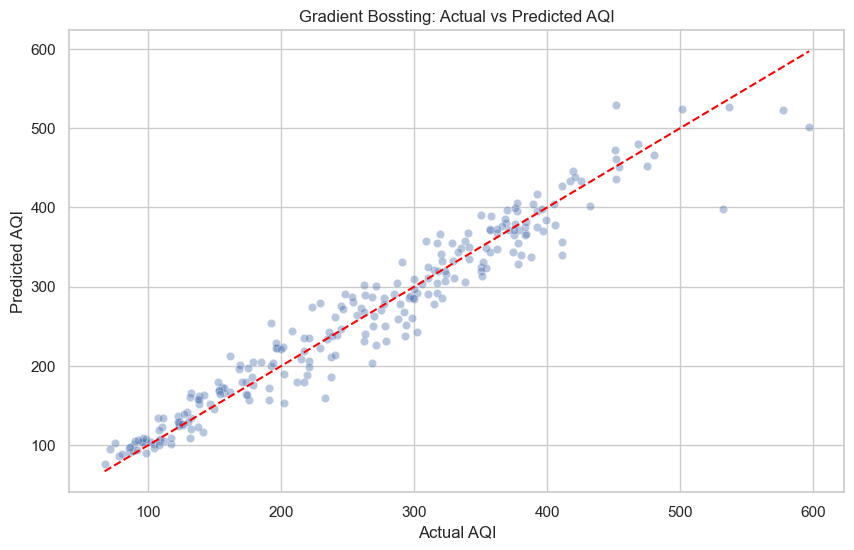

In [36]:
plt.figure(figsize = (10, 6))
sn.scatterplot(x = y_test, y = y_pred_gb, alpha = 0.4)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Gradient Bossting: Actual vs Predicted AQI")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = "red", linestyle = "--")
plt.grid(True)
plt.show()

##### Feature Importance (Gradient Boosting)

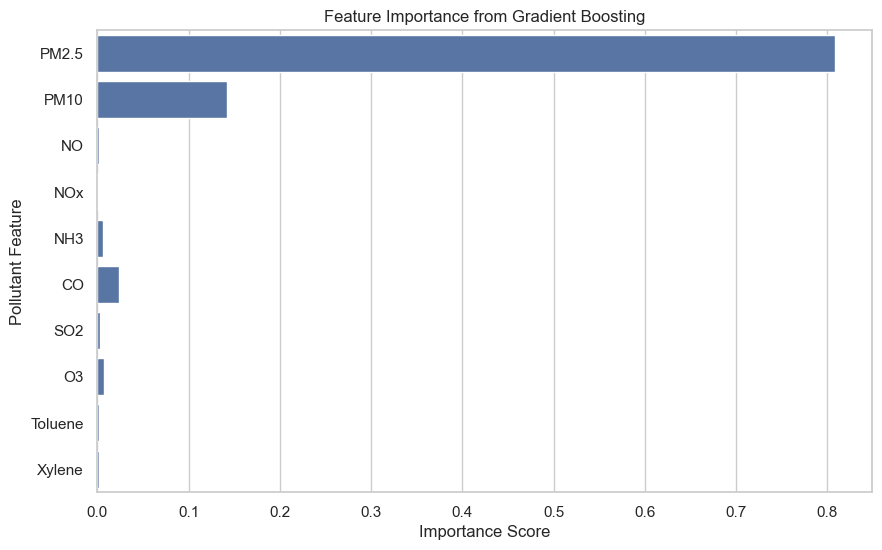

In [37]:
# Getting feature importances
gb_importances = gb_model.feature_importances_

plt.figure(figsize = (10, 6))
sn.barplot(x = gb_importances, y = X.columns)
plt.title("Feature Importance from Gradient Boosting")
plt.xlabel("Importance Score")
plt.ylabel("Pollutant Feature")
plt.show()

#### Hyperparameter Tuning (Gradient Boosting with GridSearchCV)

In [38]:
from sklearn.model_selection import GridSearchCV

# Defining parameter grid
param_grid = {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1, 0.2], "max_depth":[3, 4, 5], "subsample": [0.8, 1.0]}

# Initializing base model
gb_base = GradientBoostingRegressor(random_state = 42)

# GridSearchCV
grid_search = GridSearchCV(estimator = gb_base, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2, scoring = "r2")

# Fitting
grid_search.fit(X_train, y_train)

# Best model
best_gb = grid_search.best_estimator_

"Best Parameters:", grid_search.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


('Best Parameters:',
 {'learning_rate': 0.05,
  'max_depth': 3,
  'n_estimators': 200,
  'subsample': 0.8})

#### Evaluating the Tuned Model

In [39]:
# Predicting
y_pred_best = best_gb.predict(X_test)

# Metrics
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

In [40]:
# Print results
f"Tuned Gradient Boosting MAE: {mae_best:.2f}"
f"Tuned Gradient Boosting RMSE: {rmse_best:.2f}"
f"Tuned Gradient Boosting R² Score: {r2_best:.4f}"

'Tuned Gradient Boosting R² Score: 0.9452'

##### Visualizing the result

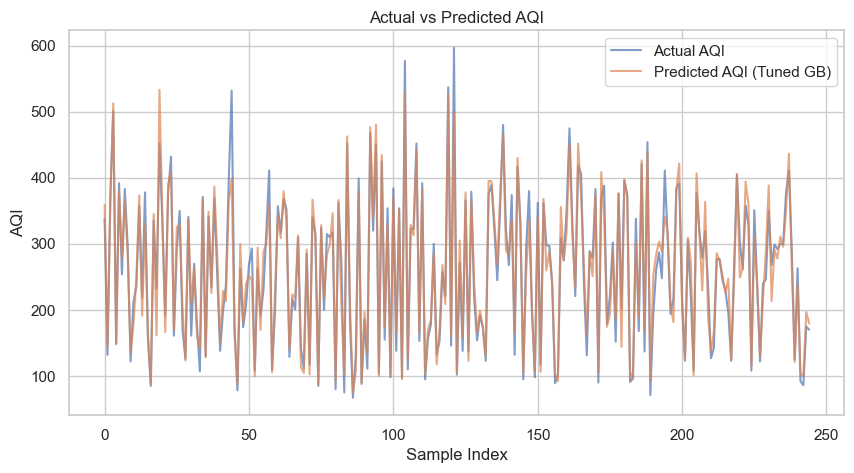

In [41]:
plt.figure(figsize = (10, 5))
plt.plot(y_test.values, label = "Actual AQI", alpha = 0.7)
plt.plot(y_pred_best, label = "Predicted AQI (Tuned GB)", alpha = 0.7)
plt.title("Actual vs Predicted AQI")
plt.xlabel("Sample Index")
plt.ylabel("AQI")
plt.legend()
plt.show()

#### Visualizing the Model Comparison

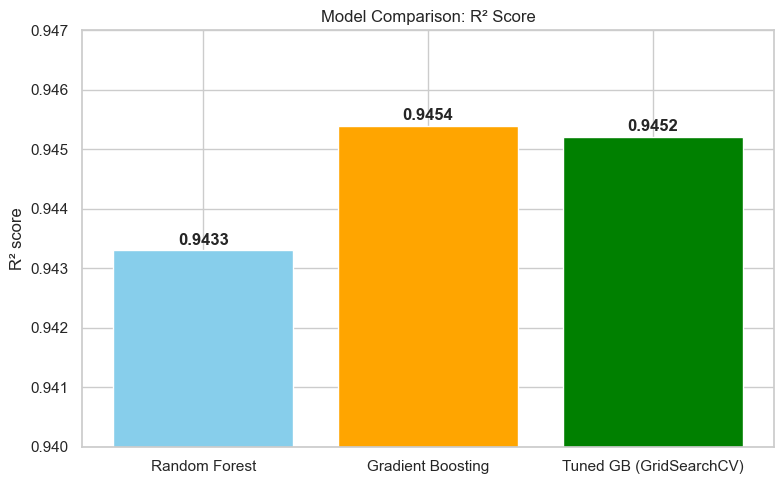

In [42]:
# R² scores from previous models
r2_scores = {"Random Forest": 0.9433, "Gradient Boosting": 0.9454, "Tuned GB (GridSearchCV)":0.9452}

# Plotting
plt.figure(figsize = (8, 5))
plt.bar(r2_scores.keys(), r2_scores.values(), color = ["skyblue", "orange", "green"])
plt.ylim(0.94, 0.947)
plt.ylabel("R² score")
plt.title("Model Comparison: R² Score")
for i, v in enumerate(r2_scores.values()):
    plt.text(i, v + 0.0001, f"{v:.4f}",ha = "center", fontweight = "bold")
plt.tight_layout()
plt.show()